In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generating the Dataset

In [2]:
X, y = make_blobs(n_samples=1000,centers=2, n_features=2)

In [3]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [4]:
df

,x,y,label
0,4.762556,8.602217,0
1,3.254778,8.191561,0
2,-4.077673,6.193483,1
3,-2.301611,5.746260,1
4,3.426353,7.058707,0
...,...,...,...
995,1.937330,5.496363,0
996,3.600344,6.914414,0
997,3.684530,7.500132,0
998,-1.810660,8.777251,1


In [5]:
X=df.drop('label', axis=1)
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=42)

# Printing the Dataset

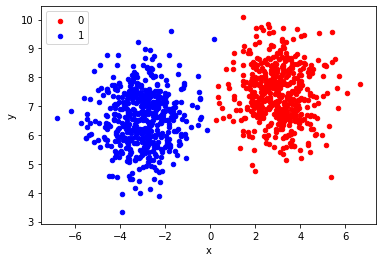

In [6]:
col = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=col[key])
plt.show()

# Printing the support vectors

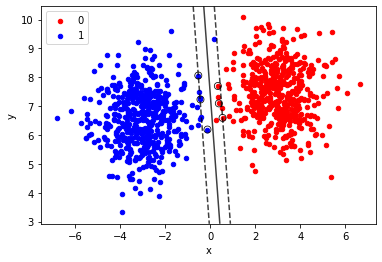

In [7]:
fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=col[key])
svclassifier = SVC(kernel='linear', C = 1.0)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

xx = np.linspace(x_limit[0], x_limit[1], 10)
yy = np.linspace(y_limit[0], y_limit[1], 10)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svclassifier.decision_function(xy).reshape(XX.shape)

axis.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.75, linestyles=['--', '-', '--'])
axis.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1], s=50, linewidth=0.75, facecolors='none', edgecolors='k')
plt.show()


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9975

In [9]:
support = svclassifier.support_vectors_
print(support)
sup1 = support[0] + 5

print("Number of support vectors: ", len(support))

[[ 0.38219492  7.09645575]
 [ 0.54758929  6.59430976]
 [ 0.33789493  7.69979043]
 [-0.12210334  6.18978903]
 [-0.43350039  7.23308376]
 [-0.52864373  8.06274431]]
Number of support vectors:  6


# Adding 2 vectors to outside the decision boundary to prove that they have no effect on the decision boundary

In [10]:
class1 = svclassifier.predict([support[0] + 2])
sup2 = support[-1] - 5
class2 = svclassifier.predict([support[-1] - 2])
print(sup1)
print(class1)
print(sup2)
print(class2)

[ 5.38219492 12.09645575]
[0]
[-5.52864373  3.06274431]
[1]


In [11]:
df.head()

,x,y,label
0,4.762556,8.602217,0
1,3.254778,8.191561,0
2,-4.077673,6.193483,1
3,-2.301611,5.746260,1
4,3.426353,7.058707,0


In [12]:
df_temp = DataFrame([[sup1[0], sup1[1], class1[0]], [sup2[0], sup2[1], class2[0]]], columns=['x','y','label'])
df_temp

,x,y,label
0,5.382195,12.096456,0
1,-5.528644,3.062744,1


In [13]:
df.append(df_temp)

,x,y,label
0,4.762556,8.602217,0
1,3.254778,8.191561,0
2,-4.077673,6.193483,1
3,-2.301611,5.746260,1
4,3.426353,7.058707,0
...,...,...,...
997,3.684530,7.500132,0
998,-1.810660,8.777251,1
999,2.474440,7.211090,0
0,5.382195,12.096456,0


# Refitting the model and plotting the graph

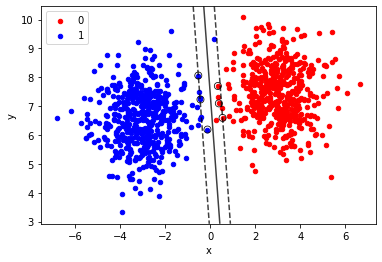

In [14]:
X=df.drop('label', axis=1)
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=42)
fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=col[key])
svclassifier = SVC(kernel='linear', C = 1.0)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

xx = np.linspace(x_limit[0], x_limit[1], 10)
yy = np.linspace(y_limit[0], y_limit[1], 10)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svclassifier.decision_function(xy).reshape(XX.shape)


axis.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.75, linestyles=['--', '-', '--'])
axis.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1], s=50, linewidth=0.75, facecolors='none', edgecolors='k')
plt.show()


In [15]:
support = svclassifier.support_vectors_
print(support)
print("Number of support vectors: ",len(support))

[[ 0.38219492  7.09645575]
 [ 0.54758929  6.59430976]
 [ 0.33789493  7.69979043]
 [-0.12210334  6.18978903]
 [-0.43350039  7.23308376]
 [-0.52864373  8.06274431]]
Number of support vectors:  6


# As you can see, the support vectors remain the same and therefore the decision boundary remains unaffected by the addition of the two extra vectors.